# Normal Distribution 

1. Why this Distribution?
2. Change on mu and std dev
3. Standard Normal Distribution
4. Skewness and Kurtosis
5. 68-95-99.7 Rule

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

## Plotting Uniform and Normal Distribution

<AxesSubplot:ylabel='Density'>

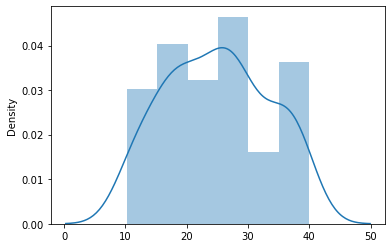

In [3]:
uniform_100 = np.random.uniform(low = 10, high = 40, size = (100))

sns.distplot(uniform_100)

<AxesSubplot:ylabel='Density'>

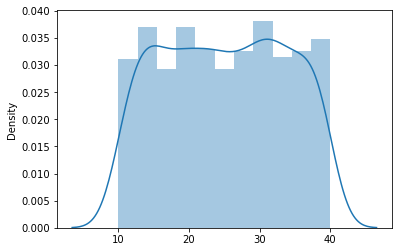

In [4]:
uniform_1000 = np.random.uniform(low = 10, high = 40, size = (1000))

sns.distplot(uniform_1000)

<AxesSubplot:ylabel='Density'>

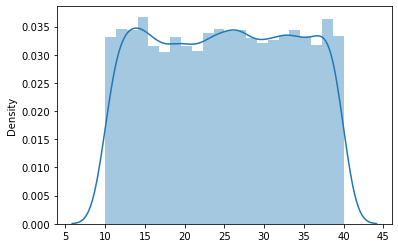

In [5]:
uniform_10000 = np.random.uniform(low = 10, high = 40, size = (10000))

sns.distplot(uniform_10000)

<AxesSubplot:ylabel='Density'>

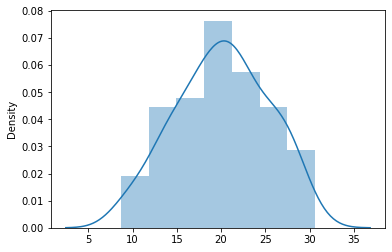

In [6]:
normal_100 = np.random.normal(loc = 20, scale = 5, size=100)

sns.distplot(normal_100)

<AxesSubplot:ylabel='Density'>

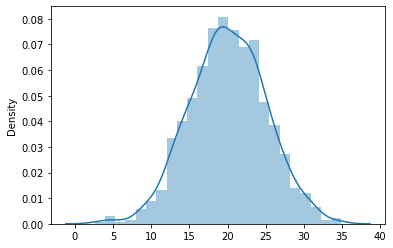

In [7]:
normal_1000 = np.random.normal(loc = 20, scale = 5, size=1000)

sns.distplot(normal_1000)

<AxesSubplot:ylabel='Density'>

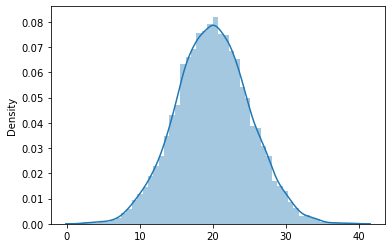

In [8]:
normal_10000 = np.random.normal(loc = 20, scale = 5, size=10000)

sns.distplot(normal_10000)

In [9]:
mu_normal_10000 = normal_10000.mean()

sigma_normal_10000 = normal_10000.std()

print(mu_normal_10000, sigma_normal_10000)

20.000446225822163 5.036144566195803


In [10]:
one_std_right = mu_normal_10000 + (1 * sigma_normal_10000)

one_std_left = mu_normal_10000 - (1 * sigma_normal_10000)

two_std_right = mu_normal_10000 + (2 * sigma_normal_10000)

two_std_left = mu_normal_10000 - (2 * sigma_normal_10000)

three_std_right = mu_normal_10000 + (3 * sigma_normal_10000)

three_std_left = mu_normal_10000 - (3 * sigma_normal_10000)

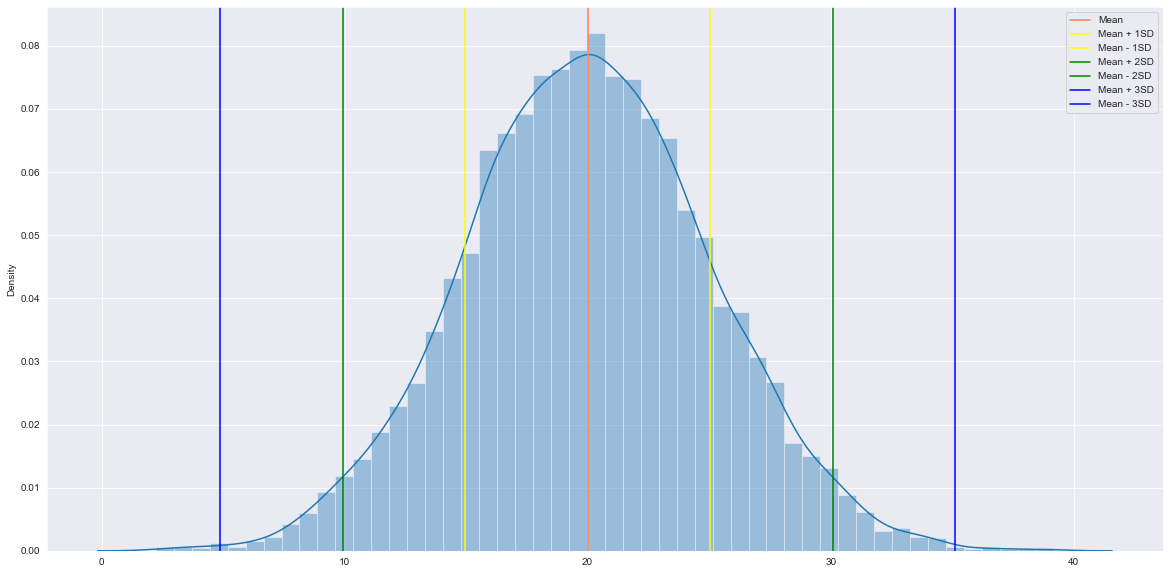

In [11]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.distplot(normal_10000)

plt.axvline(mu_normal_10000, color='coral', label='Mean')

plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
plt.axvline(two_std_right, color='green', label='Mean + 2SD')
plt.axvline(two_std_left, color='green', label='Mean - 2SD')
plt.axvline(three_std_right, color='blue', label='Mean + 3SD')
plt.axvline(three_std_left, color='blue', label='Mean - 3SD')
plt.legend();

## 65 - 95 - 99.7 Rule

In [12]:
type(normal_10000)

numpy.ndarray

In [13]:
normal_10000 < one_std_right

array([ True,  True,  True, ...,  True, False,  True])

In [14]:
(normal_10000 < one_std_right).sum()

8433

In [15]:
((one_std_left < normal_10000) & (normal_10000 < one_std_right)).sum()

6880

In [16]:
((one_std_left < normal_10000) & (normal_10000 < one_std_right)).sum()/normal_10000.size

0.688

In [17]:
((two_std_left < normal_10000) & (normal_10000 < two_std_right)).sum()/normal_10000.size

0.953

In [18]:
((three_std_left < normal_10000) & (normal_10000 < three_std_right)).sum()/normal_10000.size

0.9972

## Saving random generated values in .csv

In [19]:
df_100 = pd.DataFrame({'uniform' : uniform_100,
                  'normal' : normal_100})

df_1000 = pd.DataFrame({'uniform' : uniform_1000,
                  'normal' : normal_1000})

df_10000 = pd.DataFrame({'uniform' : uniform_10000,
                  'normal' : normal_10000})

In [21]:
df_100.to_csv('data_100.csv', index=False)

df_1000.to_csv('data_1000.csv', index=False)

df_1000.to_csv('data_10000.csv', index=False)

## Checking Skewness and Kurtosis
## Skewness

In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:

* If skewness is less than -1 or greater than 1, the distribution is highly skewed.
* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

## Kurtosis

* Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve.

In [22]:
df_100['normal'].skew()

-0.13303797214743232

In [23]:
df_100['normal'].kurt()

-0.6474893086044524

In [24]:
print('*'*10, 'SKEWNESS', '*'*10)
print()
print('100 Data Points', df_100['normal'].skew())
print('1000 Data Points', df_1000['normal'].skew())
print('10000 Data Points', df_10000['normal'].skew())
print('*'*30)
print()
print()
print('*'*10, 'KURTOSIS', '*'*10)
print()
print('100 Data Points', df_100['normal'].kurt())
print('1000 Data Points', df_1000['normal'].kurt())
print('10000 Data Points', df_10000['normal'].kurt())
print('*'*30)

********** SKEWNESS **********

100 Data Points -0.13303797214743232
1000 Data Points -0.07583470403441657
10000 Data Points 0.035310645661065884
******************************


********** KURTOSIS **********

100 Data Points -0.6474893086044524
1000 Data Points 0.05722868110261414
10000 Data Points 0.04086606299963158
******************************


## Checking Normality with QQ Plot

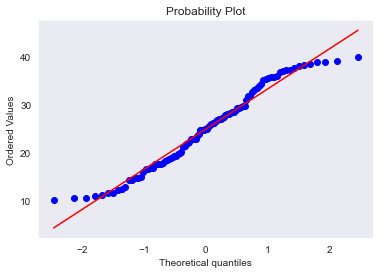

In [25]:
stats.probplot(df_100['uniform'], dist="norm", plot=plt)

plt.grid()

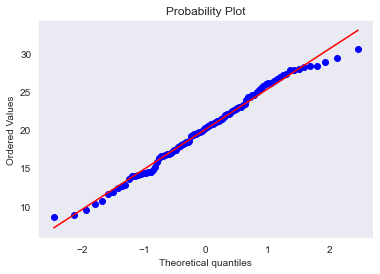

In [26]:
stats.probplot(df_100['normal'], dist="norm", plot=plt)

plt.grid()

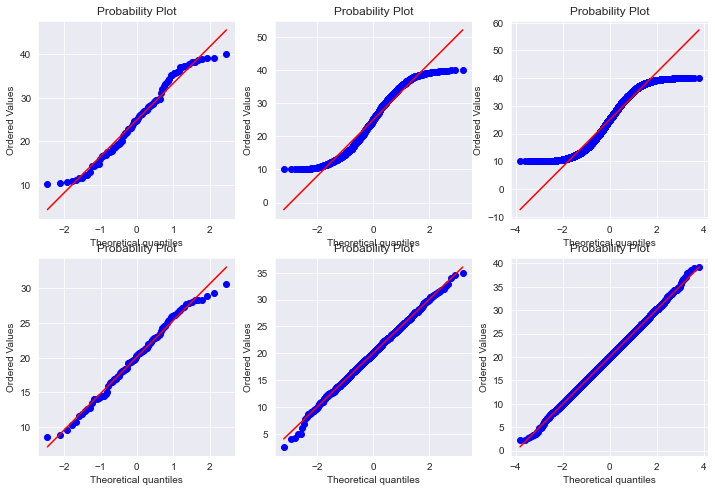

In [28]:
# Initiating a figure
plt.figure(figsize=(12, 8))

# Creating a plot with 2 row and 3 cols

plt.subplot(2, 3, 1)
stats.probplot(df_100['uniform'], dist="norm", plot=plt)

plt.subplot(2, 3, 2)
stats.probplot(df_1000['uniform'], dist="norm", plot=plt)

plt.subplot(2, 3, 3)
stats.probplot(df_10000['uniform'], dist="norm", plot=plt)

plt.subplot(2, 3, 4)
stats.probplot(df_100['normal'], dist="norm", plot=plt)

plt.subplot(2, 3, 5)
stats.probplot(df_1000['normal'], dist="norm", plot=plt)

plt.subplot(2, 3, 6)
stats.probplot(df_10000['normal'], dist="norm", plot=plt)

plt.show()

## Box - Cox Transformation

<AxesSubplot:ylabel='Density'>

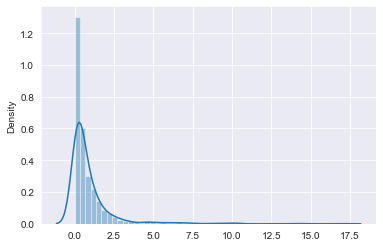

In [29]:
pareto_rv = np.random.pareto(a = 2, size = 1000)

sns.distplot(pareto_rv)

<AxesSubplot:ylabel='Density'>

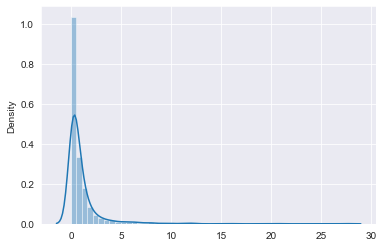

In [30]:
pareto_rv = np.random.pareto(a = 2, size = 1000)

sns.distplot(pareto_rv)

In [31]:
# x_t = tranformed by box-cox, l = Lambda

x_t, l = stats.boxcox(pareto_rv)

print(l)

0.09332067816172765


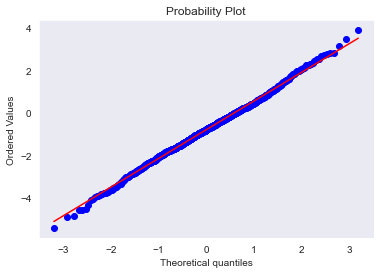

In [32]:

stats.probplot(x_t, dist="norm", plot=plt)

plt.grid()